In [1]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import os 

In [6]:
folder_path = "C:\\Users\\liang\\OneDrive\\Desktop\\Anote_Q&A\\Claude\\Evaluation"

In [7]:
all_files = os.listdir(folder_path)

In [8]:
def compute_rouge_l(candidate, reference):
    m, n = len(candidate), len(reference)
    print(m,n)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])
    
    return dp_table[m][n] / n

In [9]:
csv_files = [file for file in all_files if file.endswith('.csv')]


In [10]:

total_average_rouge_l_scores = []
num_labels = []
count = 0 
for csv_file in csv_files:

    count += 10
    num_labels.append(count)

    df = pd.read_csv(csv_file)
    rouge_l_scores = [] 

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['syntheses'] 
        
        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)
        print(f"ROUGE-L score: {rouge_l_score:.4f}")
    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

8 26
ROUGE-L score: 0.1923
5 26
ROUGE-L score: 0.1538
196 611
ROUGE-L score: 0.1964
295 314
ROUGE-L score: 0.9299
48 68
ROUGE-L score: 0.7059
109 249
ROUGE-L score: 0.3614
245 265
ROUGE-L score: 0.9245
139 159
ROUGE-L score: 0.8742
5 24
ROUGE-L score: 0.0833
4 25
ROUGE-L score: 0.1200
4 378
ROUGE-L score: 0.0106
5 25
ROUGE-L score: 0.0800
4 24
ROUGE-L score: 0.0417
124 617
ROUGE-L score: 0.1605
126 414
ROUGE-L score: 0.2005
1 21
ROUGE-L score: 0.0476
49 340
ROUGE-L score: 0.1059
5 24
ROUGE-L score: 0.0417
5 362
ROUGE-L score: 0.0138
5 25
ROUGE-L score: 0.1600
9 27
ROUGE-L score: 0.2222
8 28
ROUGE-L score: 0.1786
372 402
ROUGE-L score: 0.4900
107 442
ROUGE-L score: 0.1652
338 407
ROUGE-L score: 0.4742
71 220
ROUGE-L score: 0.2409
71 245
ROUGE-L score: 0.1714
73 529
ROUGE-L score: 0.1210
43 34
ROUGE-L score: 0.4118
47 337
ROUGE-L score: 0.1246
4 24
ROUGE-L score: 0.1667
176 668
ROUGE-L score: 0.1826
473 540
ROUGE-L score: 0.8519
152 373
ROUGE-L score: 0.3673
135 528
ROUGE-L score: 0.1970

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


Text(0.5, 1.0, 'ROUGE-L Scores Comparison')

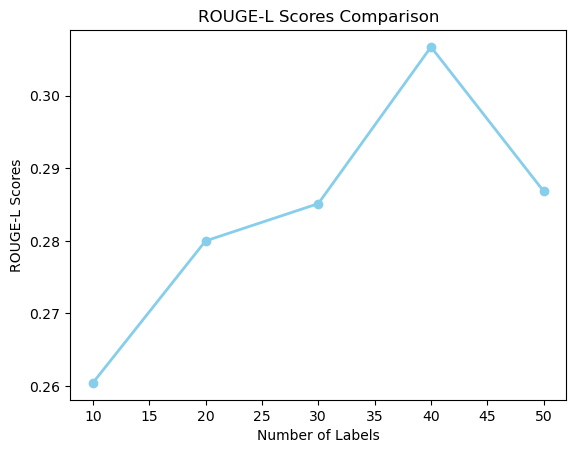

In [12]:
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('ROUGE-L Scores')
plt.title('ROUGE-L Scores Comparison')
